In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing, basinhopping
import os 

from scipy.stats import betabinom, poisson, norm

import seaborn as sns


In [188]:

def shift(arr, num, extrapolate_n = 10):
    """
    Shifts the incidence array backwards, and extrapolates the missing numbers using a quadratic model.
    """

    completion_model = np.polyfit(np.arange(extrapolate_n), arr[-num:][-extrapolate_n:], 2)
    x = np.arange(extrapolate_n, -1*num+extrapolate_n) 

    extrapolated = completion_model[0]*x**2 + completion_model[1]*x + completion_model[2]

    return np.concatenate([arr[-num:], extrapolated])

    
def rolling_avg(diffs):
    avgs = []
    for i, _ in enumerate(diffs[:-1]):
        avgs.append(np.mean(diffs[i:i+1]))
    return np.asarray(avgs)
    
def deriv(arr):

    diffs = np.diff(arr).tolist()
    diffs = [diffs[0]]+ diffs + [diffs[-1]]
    return rolling_avg(diffs)


def conv(arr, arr2):
    left_zeros =
    return np.convolve(arr, arr2)

In [162]:
simulation = pd.read_csv('data/process_noise_SEIR.csv')
psf = pd.read_csv('incubation_period.csv')['seir'].to_numpy()
i = simulation['symptomatic_incidence'].to_numpy()
neg_psf = psf[::-1]

mean_shift = np.sum((np.arange(len(psf)))* psf)
starting_shift = int(np.round(mean_shift))

o = i
z = simulation['scaled_true_incidence']

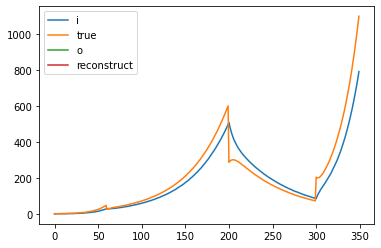

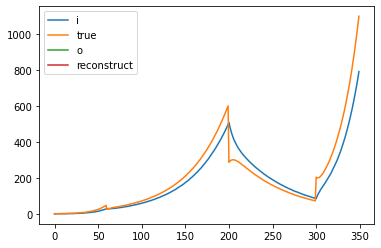

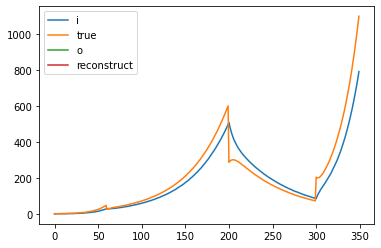

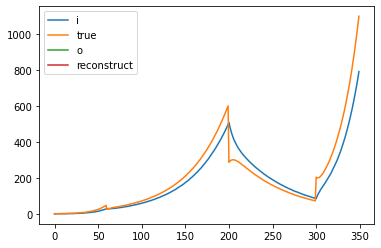

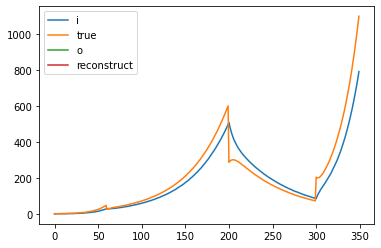

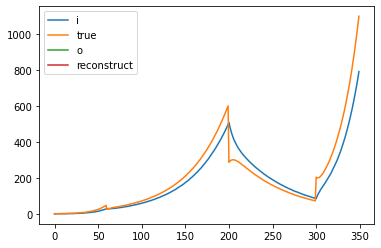

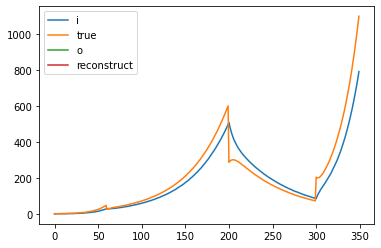

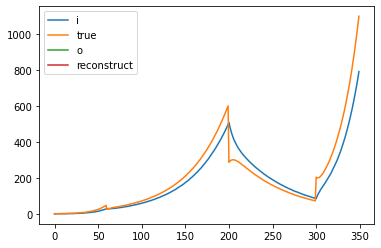

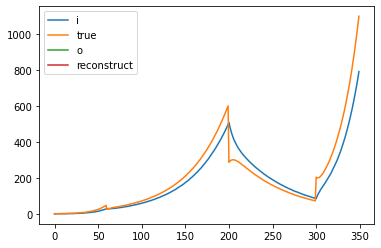

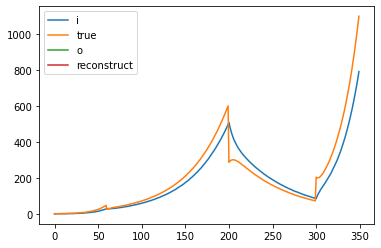

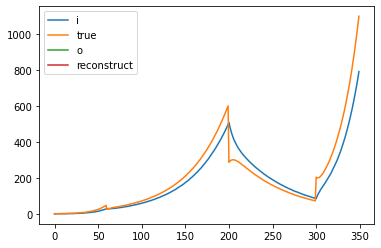

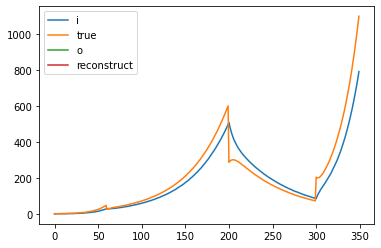

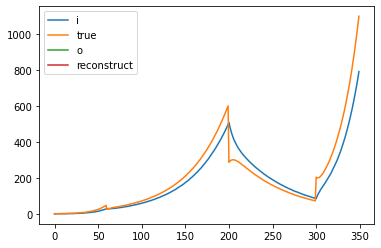

KeyboardInterrupt: 

In [216]:

for _ in range(100):
    io = i/np.convolve(o, psf, 'same')
    io[io == np.inf] = 0

  #  scaling =  (1 - 0.01*deriv(deriv(o)/deriv(np.abs(o))))
    o = o * np.convolve(io, neg_psf, 'same')#/scaling
    
    plt.plot(i, label='i')
    plt.plot(z, label='true')
    plt.plot(o[starting_shift*2+1:-2], label='o') #deconv goes crazy on the LAST index
    plt.plot(np.convolve(o, psf, 'same')[:-starting_shift*2-3], label='reconstruct')
    plt.legend()
    plt.show()


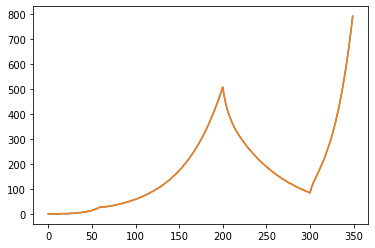

In [247]:
r = np.diff(i)/rolling_avg(i)

o0 = 1
o = [1]

for rt in r:
    o0 += o0*rt
    o.append(o0)
o = np.asarray(o)



plt.plot(o)
plt.plot(i)

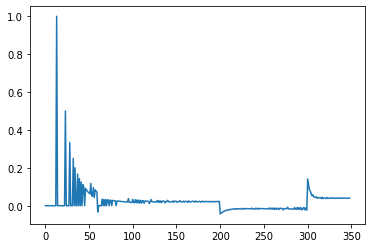

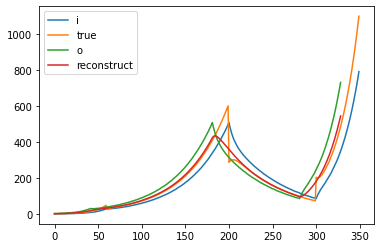

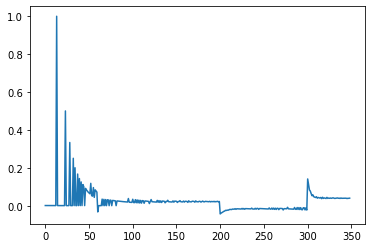

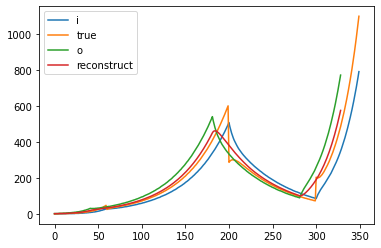

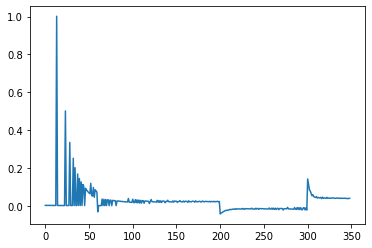

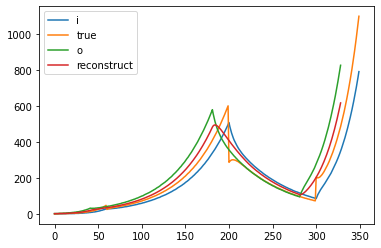

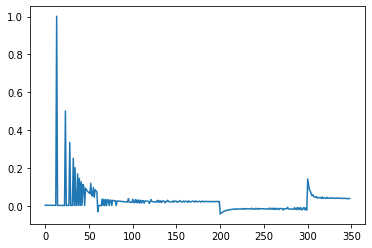

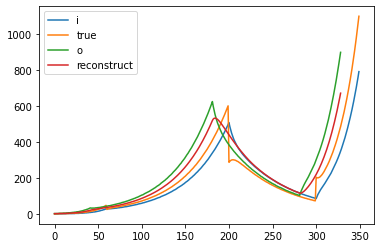

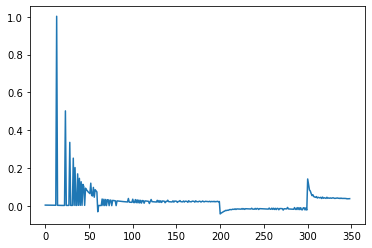

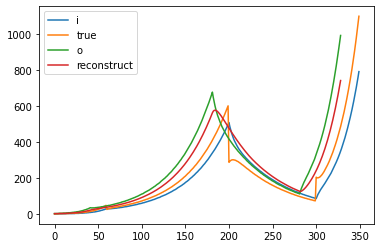

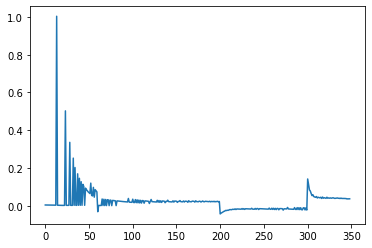

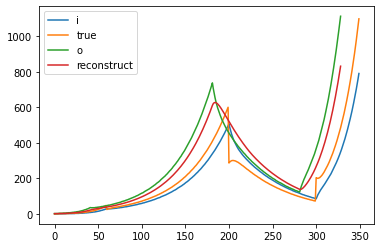

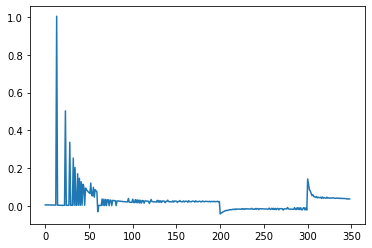

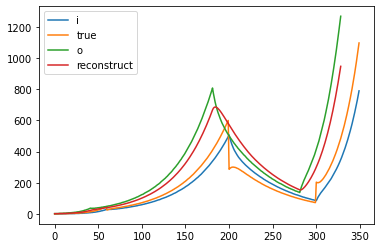

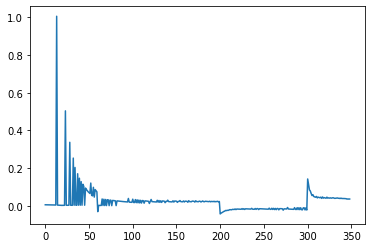

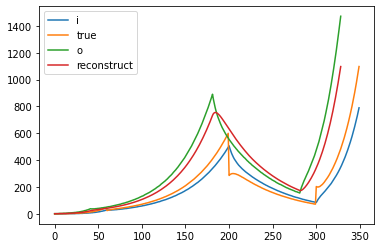

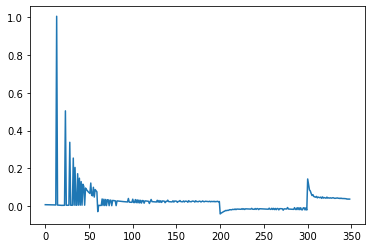

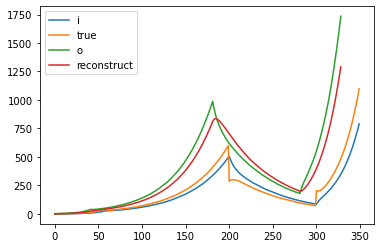

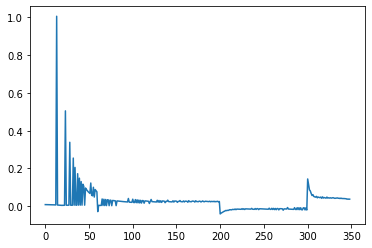

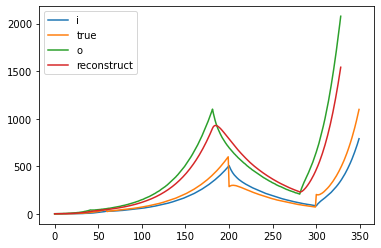

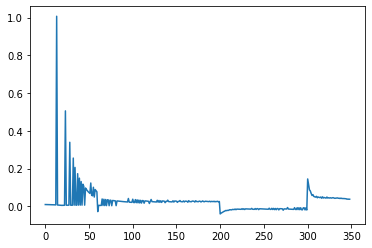

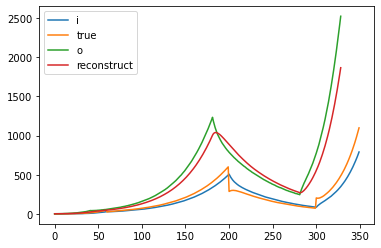

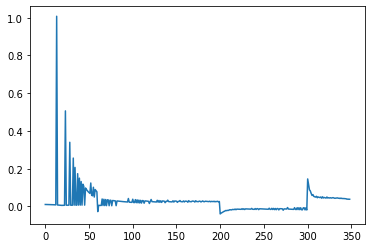

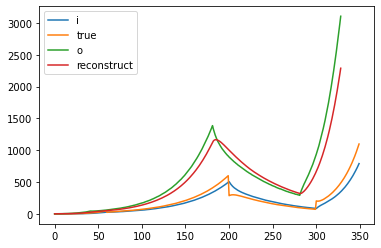

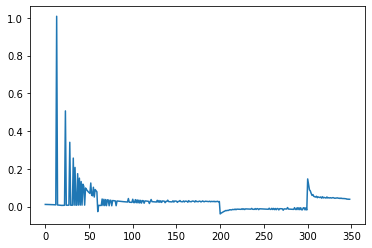

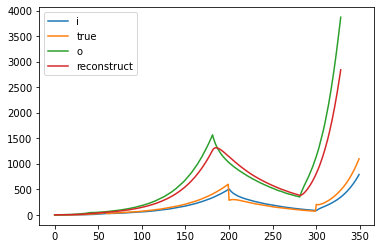

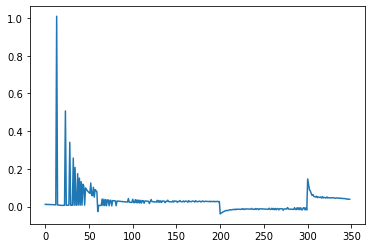

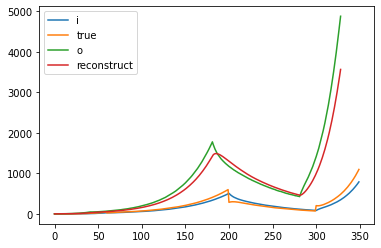

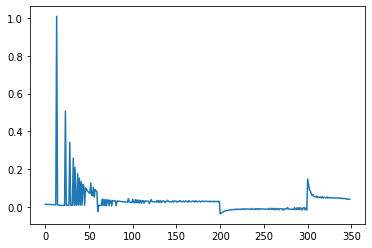

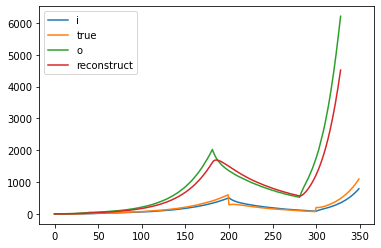

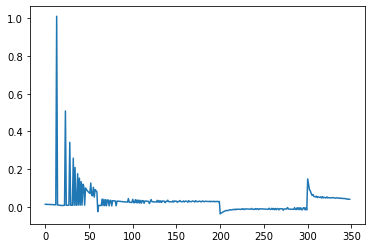

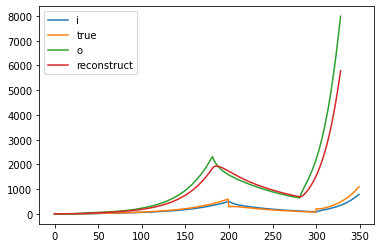

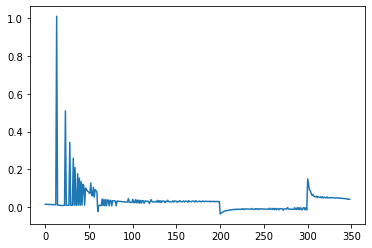

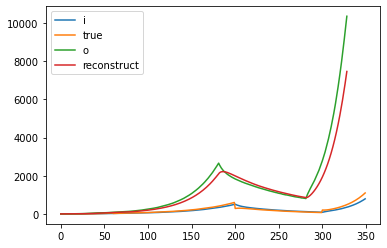

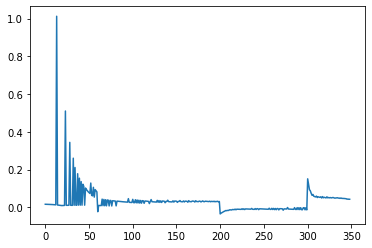

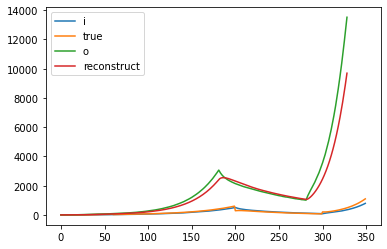

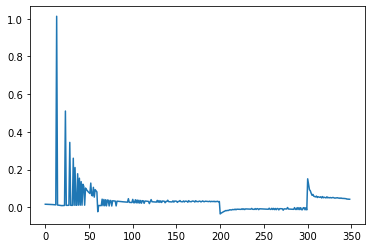

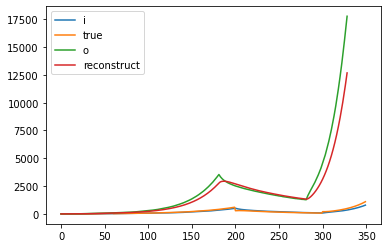

KeyboardInterrupt: 

In [251]:
r = np.diff(i)/rolling_avg(i)

for _ in range(100):
    o0 = 1
    o = [1]

    for rt in r:
        o0 += o0*rt
        o.append(o0)
    o = np.asarray(o)


    io = i/np.convolve(o, psf, 'same')

    plt.plot(r)
    plt.show() 
    r = r + 0.001*(1-np.convolve(io, neg_psf, 'same')[1:])
    
    plt.plot(i, label='i')
    plt.plot(z, label='true')
    plt.plot(o[starting_shift*2+1:-2], label='o') #deconv goes crazy on the LAST index
    plt.plot(np.convolve(o, psf, 'same')[:-starting_shift*2-3], label='reconstruct')
    plt.legend()
    plt.show()
